## Exploring the CLEAR Dataset

*Author: Sean Trott*

The CLEAR corpus is described in more detail [here](https://link.springer.com/article/10.3758/s13428-022-01802-x). In this notebook, I explore the dataset and characterize some of the basic relationships (descriptive statistics, correlations, and so on).

Brief notes:

- The corpus contains excerpts from texts between 1700s and 2000s.
- It also contains the results of running automated readability formulas on these excerpts. 
- Critically, it also has a human "gold standard" readability score, called `BT_easiness` score. For this score, teachers made pairwise judgments about texts; then, the Bradley-Terry formula was used to derive coefficient for each text, reflecting its "readability".  
- In the original paper, that `BT_easiness` score was correlated with a number of other scores, and also psycholinguistic variables, such as frequency, concreteness, age of acquisition, and more (see Table 3 from the paper). This score demonstrated pretty good internal reliability.

### Import libraries

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

### Seaborn theme
sns.set_theme(style="white", palette='crest')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [160]:
### Styling
# Get the Mako palette
palette = sns.color_palette("mako", 3)

# Select colors from opposite ends
color1 = palette[0]  # First color
color2 = palette[-1] # Last color
color3 = palette[3 // 2]

### Load CLEAR corpus

In [161]:
df = pd.read_csv("../data/CLEAR-Corpus/CLEAR_corpus_final.csv")
df.head(3)

,ID,Author,Title,Anthology,URL,Pub Year,Categ,Sub Cat,Lexile Band,Location,...,BT_easiness,s.e.,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CML2RI
0,400,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,1914.0,Lit,NaN,900,mid,...,-0.340259,0.464009,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,12.097815
1,401,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,1917.0,Lit,NaN,700,mid,...,-0.315372,0.480805,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,22.550179
2,402,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,1917.0,Lit,NaN,900,mid,...,-0.580118,0.476676,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,18.125279


In [162]:
df.shape

(4724, 28)

### Descriptive statistics

Here, we just provide some basic descriptive statistics and visualizations about the dataset.

In [163]:
### average #words, #sentences, per excerpt
df[['Google WC', 'Sentence Count']].describe()

,Google WC,Sentence Count
count,4724.000000,4724.000000
mean,171.960203,9.570703
std,16.988921,4.640162
min,125.000000,2.000000
25%,158.000000,7.000000
50%,174.000000,8.000000
75%,186.000000,11.000000
max,205.000000,41.000000


In [164]:
### average readability scores
df[['Flesch-Reading-Ease', 'Automated Readability Index',  'SMOG Readability', 
    'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CML2RI']].describe()

,Flesch-Reading-Ease,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CML2RI
count,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000
mean,65.231230,10.264630,10.198582,7.674784,0.165342,0.166390,15.465939
std,18.178085,5.240155,3.263997,1.944550,0.109087,0.105761,7.430752
min,-28.990000,-3.090000,0.000000,0.280000,-0.168350,-0.142080,-4.380899
25%,53.627500,6.820000,8.000000,6.557500,0.085567,0.089680,10.102327
50%,66.330000,10.050000,10.000000,7.625000,0.162990,0.164900,15.054398
75%,78.650000,13.210000,12.000000,8.870000,0.240968,0.238890,20.131281
max,114.030000,51.590000,18.000000,14.190000,0.599770,0.594850,47.214743


In [165]:
### Gold standard readability scores
df[['BT_easiness']].describe()

,BT_easiness
count,4724.000000
mean,-0.957639
std,1.033656
min,-3.676268
25%,-1.696555
50%,-0.909094
75%,-0.203428
max,1.711390


<Axes: xlabel='BT_easiness', ylabel='Count'>

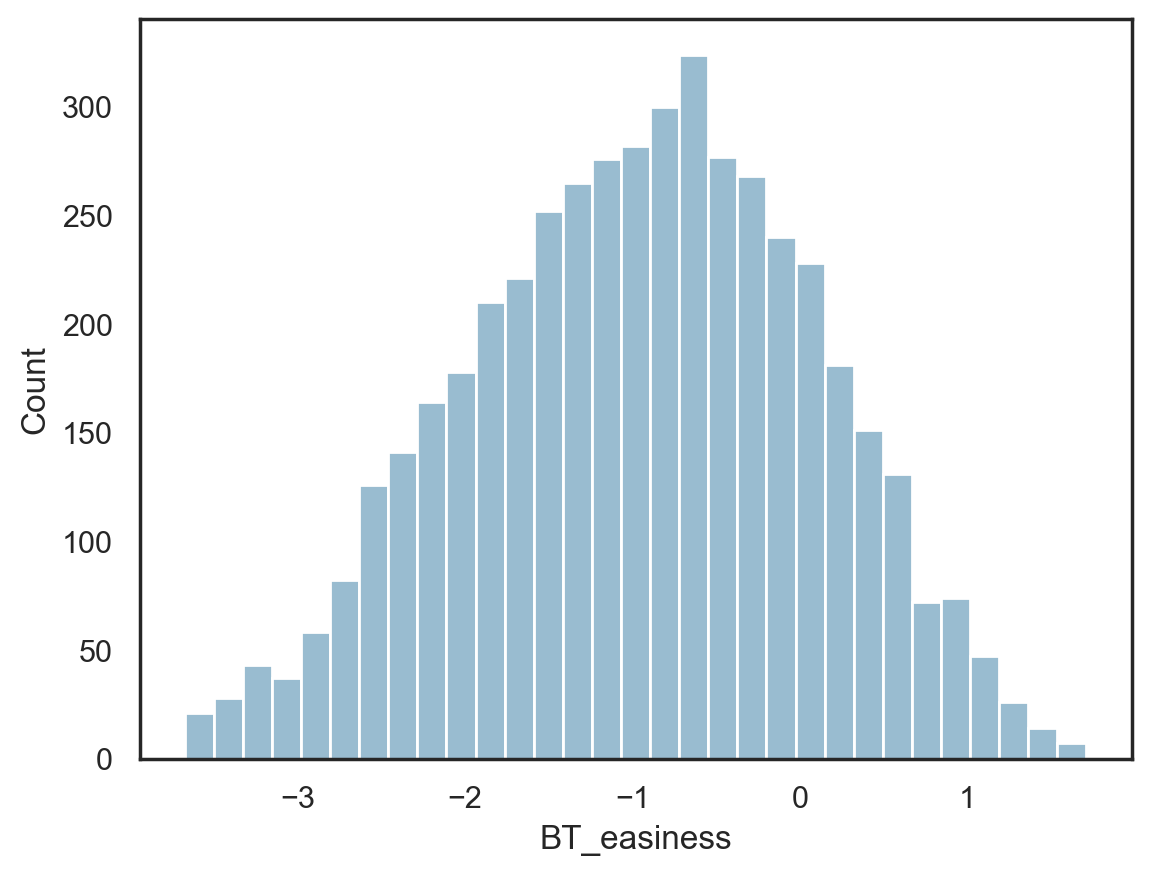

In [166]:
sns.histplot(data = df, x = 'BT_easiness', color = color3, alpha = .5)

### Visualizations and correlations

Now, we describe the relationships between factors in the dataset.

<Axes: xlabel='Flesch-Reading-Ease', ylabel='BT_easiness'>

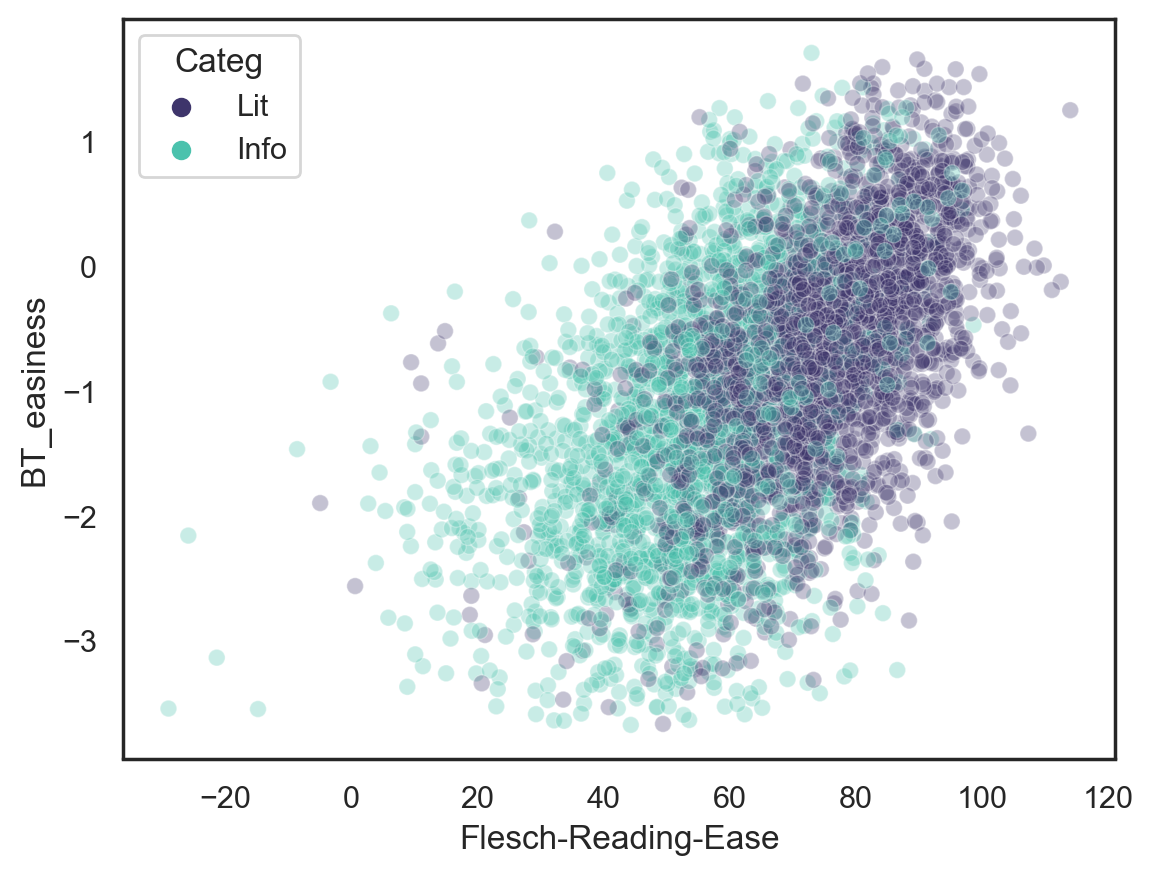

In [167]:
### In general, texts with higher Flesch scores are rated as easier
sns.scatterplot(data = df, x = "Flesch-Reading-Ease", 
                y = "BT_easiness", hue = "Categ",
                palette = [color1, color2],
               alpha = .3)

<Axes: xlabel='Categ', ylabel='BT_easiness'>

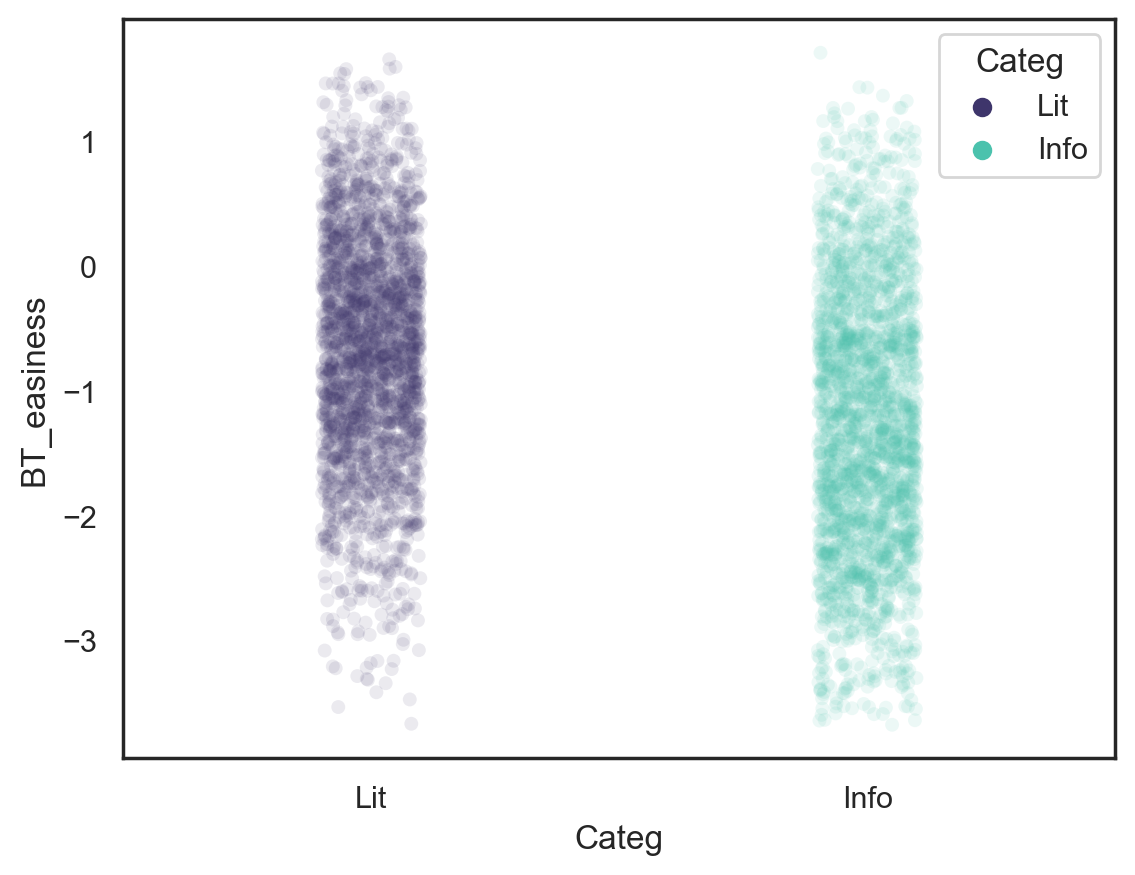

In [168]:
### Literature is slightly easier to read
sns.stripplot(data = df, x = 'Categ', y = 'BT_easiness', hue = 'Categ',
               palette = [color1, color2], alpha = .1)

<Axes: xlabel='Sub Cat', ylabel='BT_easiness'>

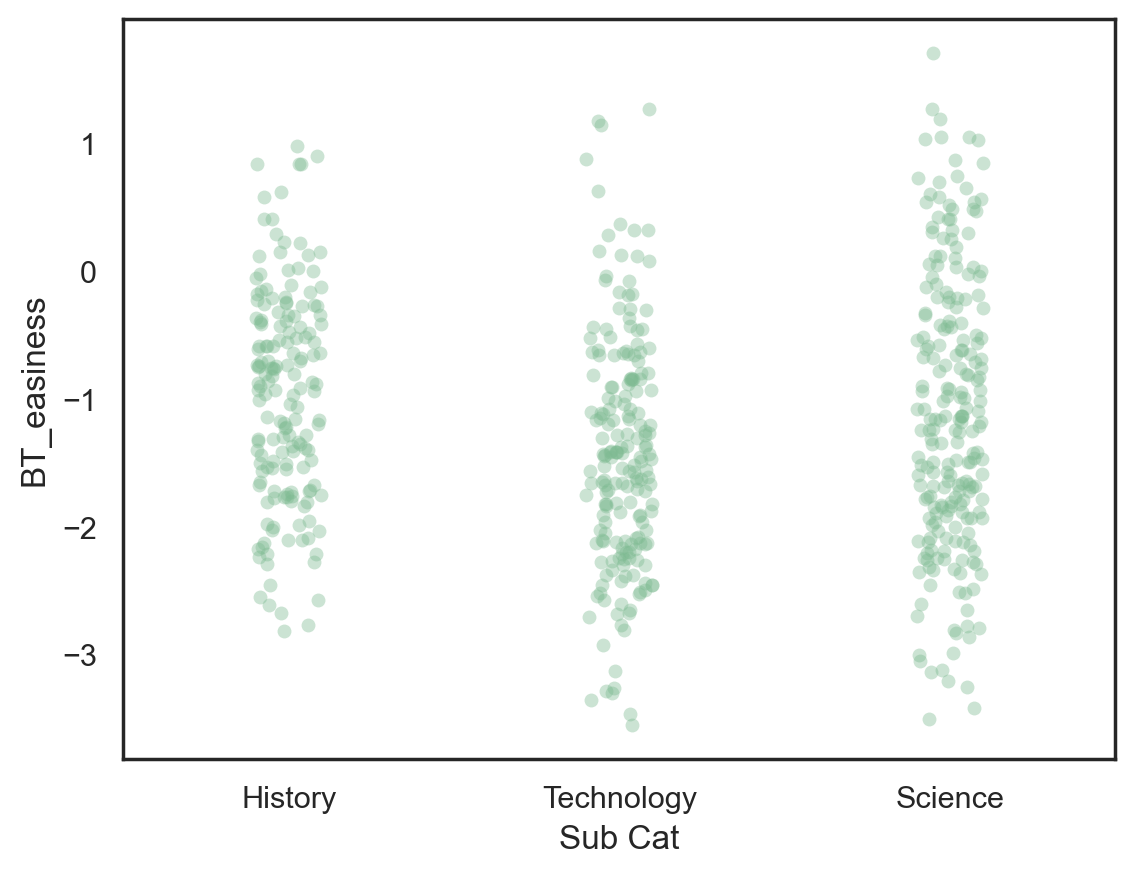

In [255]:
### Literature is slightly easier to read
df_subset = df[df['Categ'] == 'Info'].dropna(subset='Sub Cat')
sns.stripplot(data = df_subset, x = 'Sub Cat', y = 'BT_easiness', alpha = .4)

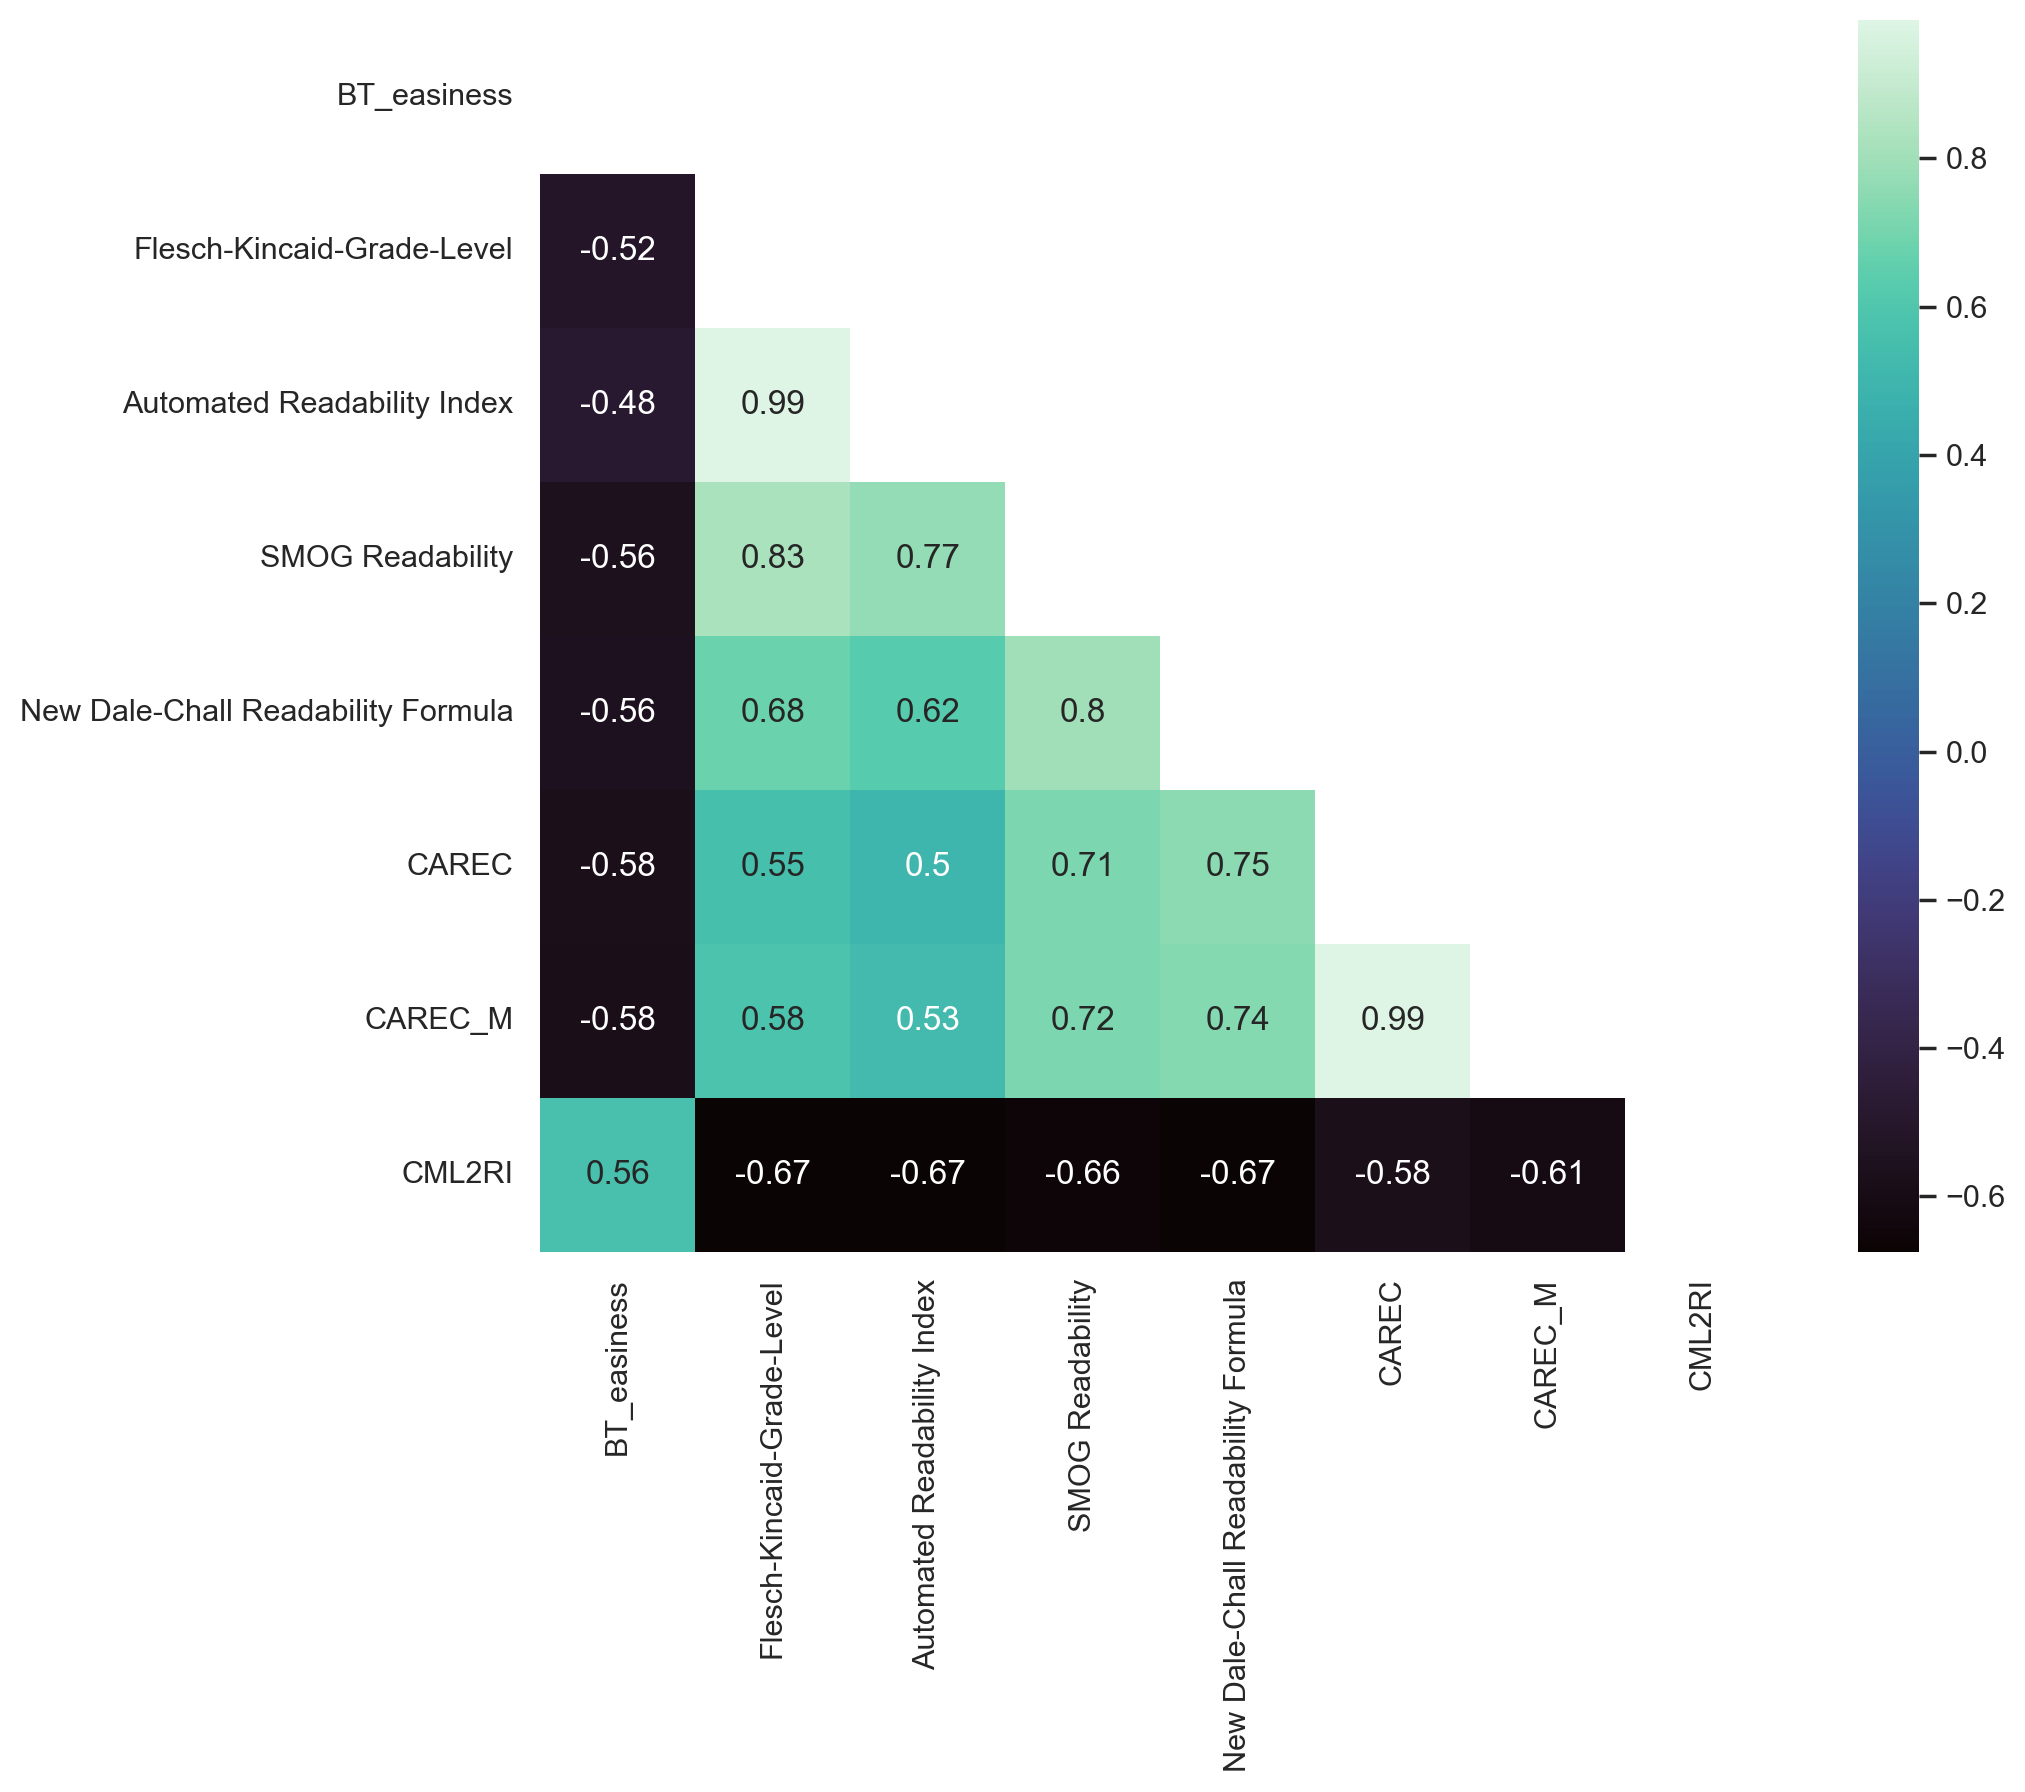

In [169]:
### Now, create a correlation matrix

df_subset = df[[ 'BT_easiness', 'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
               'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CML2RI']]
correlation_matrix = df_subset.corr()
plt.figure(figsize=(10,8))

### Mask lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
### Now plot using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='mako', mask=mask)
plt.show()

### Statistical modeling

Finally, we build a linear model predicting `BT_easiness` from a range of factors available in the dataset.

In [227]:
## Rename some variables for ease
df['Word_count'] = df['Google WC']
df['Flesch'] = df['Flesch-Reading-Ease']
df['Sentence_count'] = df['Sentence Count']
df['ARI'] = df['Automated Readability Index']
df['SMOG'] = df['SMOG Readability']
df['NDC'] = df['New Dale-Chall Readability Formula']

## Turn Category into a numeric variable
df['Categ_numeric'] = df['Categ'].apply(lambda x: 1 if x == 'Lit' else 0)

In [242]:
## Define features
features = ['Categ_numeric', 'Paragraphs', 'Word_count',"Sentence_count", "Flesch-Reading-Ease", "ARI", "SMOG", "NDC", "CAREC_M", "CML2RI"]

# Get predictors and target
predictors = df[features]  
target = df['BT_easiness']

# Standardize the predictors
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Add intercept
predictors_scaled = sm.add_constant(predictors_scaled)

# Fit the OLS model
model = sm.OLS(target, predictors_scaled).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            BT_easiness   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     414.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:17:49   Log-Likelihood:                -5368.6
No. Observations:                4724   AIC:                         1.076e+04
Df Residuals:                    4713   BIC:                         1.083e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9576      0.011    -87.204      0.0

<ErrorbarContainer object of 3 artists>

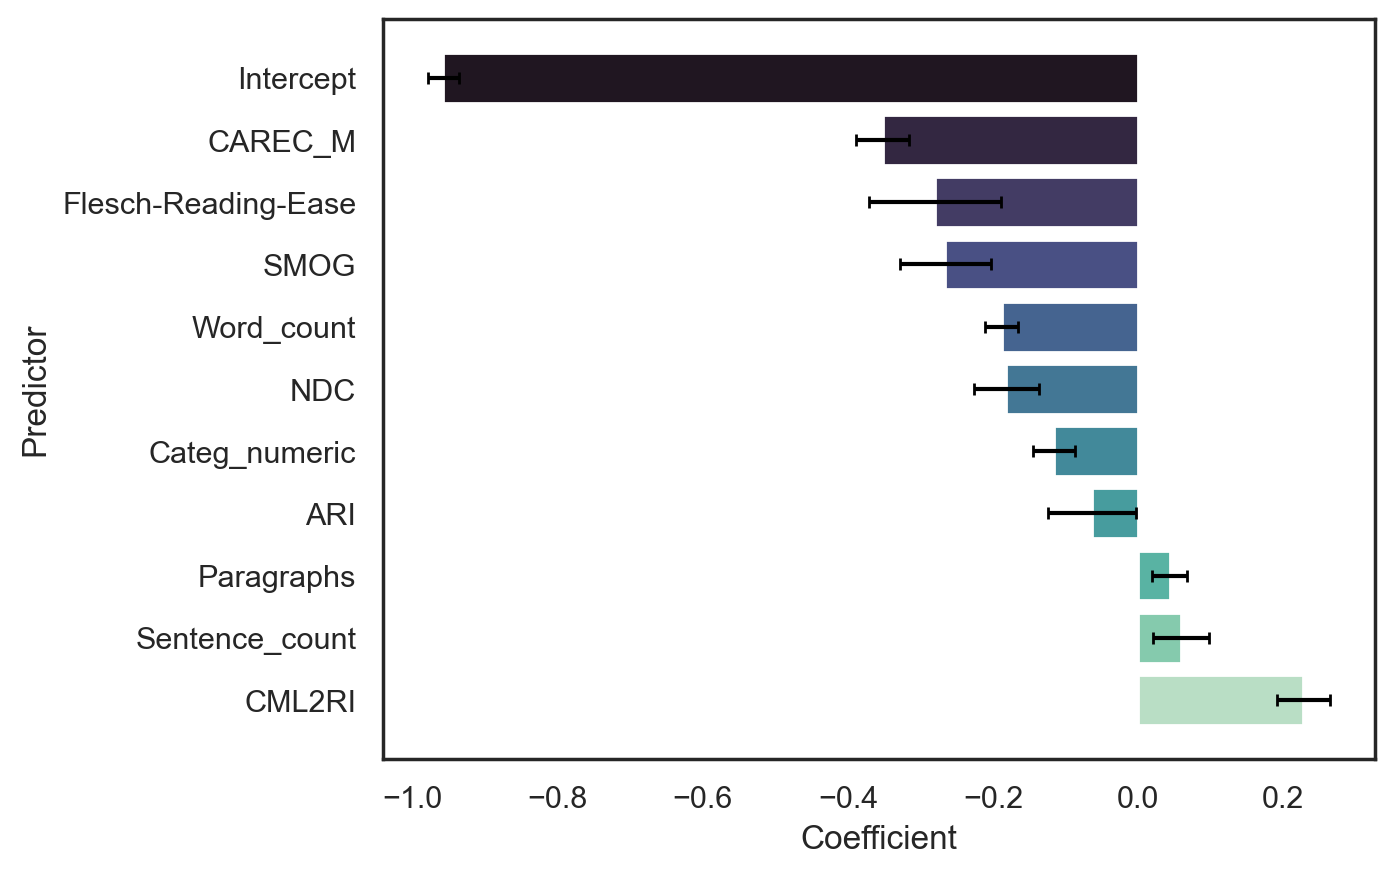

In [243]:
### Visualize coefficients
df_results = pd.DataFrame({
    'Coefficient': model.params,
    'Predictor': ['Intercept'] + features,
    'Standard Error': model.bse
})

df_results['CI'] = df_results['Standard Error'] * 1.96

### Plot results
df_results = df_results.sort_values("Coefficient")
### Pointplot
sns.barplot(data = df_results, y = "Predictor", x = "Coefficient", palette = "mako")
plt.errorbar(y = df_results['Predictor'], x = df_results['Coefficient'],
            xerr=df_results['CI'], fmt='none', c= 'black', capsize = 2)